In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [20]:
results_path = "/home/auv/software/optimal_camera_placement/results_forward"
res_folders = os.listdir(results_path)
res_folders.sort()
for i, fol in enumerate(res_folders):
    print(i)
    print("current folder: "+ fol)
    traj_name, str2 = fol.split("_")
    num_runs = int(str2[:-4])
   
    l = os.listdir(os.path.join(results_path , fol))
    all_errors_log_file = [i for i in l  if "results" in i]
    print(all_errors_log_file[0][:-5][-1])
    print(all_errors_log_file)

0
current folder: forward_10runs
6
['results_forward6_.txt', 'results_forward3_.txt', 'results_forward4_.txt', 'results_forward2_.txt', 'results_forward5_.txt']


Number of candidates:68, number of trajectories: 1
current folder: forward_10runs
Traje name :forward
Num of experiments: 10
['results_forward2_.txt', 'results_forward3_.txt', 'results_forward4_.txt', 'results_forward5_.txt', 'results_forward6_.txt']
[2]
[2, 3]
[2, 3, 4]
[2, 3, 4, 5]
[2, 3, 4, 5, 6]
{0: [0.0056613760440522845, 0.9182175654208221, 0.9720246020459123, 0.9782983508051195, 0.9797927702012222]}
plotting median
greedy:
[0.0056613760440522845, 0.9182175654208221, 0.9720246020459123, 0.9782983508051197, 0.9797927702012224]
cvx_rounded:
[-1.3125695935116147e-09, -1.4878551308189786e-09, -1.503619969506171e-09, -2.189467247490816e-09, -2.6150564633116496e-09]
even:
[-1.6814914470805614e-10, 0.01104421145176822, 0.0771603319616943, 0.3554055419378198, 0.9792353027107789]
manual:
[-4.71928309275598e-10, 0.01104421145176822, 0.03466522260715975, 0.9779229560764904, 0.05779744844805344]
random:
[0.8855488325260285, 0.09788834597971356, 0.26578568785827017, 0.9786316085226803, 0.9696

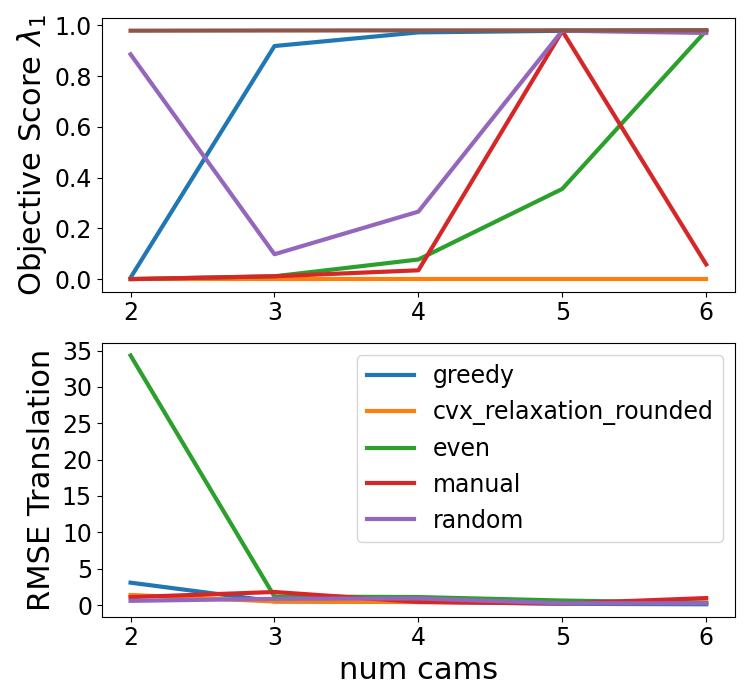

In [22]:
############################################################################################################
######   Single data, multiple select_ks
############################################################################################################

results_path = "/home/auv/software/optimal_camera_placement/results_forward"
traj_folders = os.listdir(results_path)
traj_folders.sort()
num_cams_list = []

dfs ={}

num_cands = 68

num_trajs=len(traj_folders)
print("Number of candidates:{}, number of trajectories: {}".format(num_cands, num_trajs))

times_list_g= {traj: [] for traj in range(num_trajs)}
times_list_fw = {traj: [] for traj in range(num_trajs)}

score_list_g = {traj: [] for traj in range(num_trajs)}
score_list_fw = {traj: [] for traj in range(num_trajs)}
score_list_unr_fw = {traj: [] for traj in range(num_trajs)} 
score_list_eq = {traj: [] for traj in range(num_trajs)}
score_list_std = {traj: [] for traj in range(num_trajs)}
score_list_rnd = {traj: [] for traj in range(num_trajs)}

score_med_list_g = {traj: [] for traj in range(num_trajs)}
score_med_list_fw = {traj: [] for traj in range(num_trajs)}
score_med_list_unr_fw = {traj: [] for traj in range(num_trajs)} 
score_med_list_eq = {traj: [] for traj in range(num_trajs)}
score_med_list_std = {traj: [] for traj in range(num_trajs)}
score_med_list_rnd = {traj: [] for traj in range(num_trajs)}

score_std_list_g = {traj: [] for traj in range(num_trajs)}
score_std_list_fw = {traj: [] for traj in range(num_trajs)}
score_std_list_unr_fw = {traj: [] for traj in range(num_trajs)} 
score_std_list_eq = {traj: [] for traj in range(num_trajs)}
score_std_list_std = {traj: [] for traj in range(num_trajs)}
score_std_list_rnd = {traj: [] for traj in range(num_trajs)}


rmse_slam_list_g = {traj: [] for traj in range(num_trajs)}
rmse_slam_list_fw = {traj: [] for traj in range(num_trajs)}
rmse_slam_list_eq = {traj: [] for traj in range(num_trajs)}
rmse_slam_list_std = {traj: [] for traj in range(num_trajs)}
rmse_slam_list_rnd = {traj: [] for traj in range(num_trajs)}

rmse_med_slam_list_g = {traj: [] for traj in range(num_trajs)}
rmse_med_slam_list_fw = {traj: [] for traj in range(num_trajs)}
rmse_med_slam_list_eq = {traj: [] for traj in range(num_trajs)}
rmse_med_slam_list_std = {traj: [] for traj in range(num_trajs)}
rmse_med_slam_list_rnd = {traj: [] for traj in range(num_trajs)}

rmse_slam_gt_list_g = {traj: [] for traj in range(num_trajs)}
rmse_slam_gt_list_fw = {traj: [] for traj in range(num_trajs)}


rmse_loc_list_g = {traj: [] for traj in range(num_trajs)}
rmse_loc_list_fw = {traj: [] for traj in range(num_trajs)}
rmse_loc_list_eq = {traj: [] for traj in range(num_trajs)}
rmse_loc_list_std = {traj: [] for traj in range(num_trajs)}
rmse_loc_list_rnd = {traj: [] for traj in range(num_trajs)}

rmse_med_loc_list_g = {traj: [] for traj in range(num_trajs)}
rmse_med_loc_list_fw = {traj: [] for traj in range(num_trajs)}
rmse_med_loc_list_eq = {traj: [] for traj in range(num_trajs)}
rmse_med_loc_list_std = {traj: [] for traj in range(num_trajs)}
rmse_med_loc_list_rnd = {traj: [] for traj in range(num_trajs)}

rmse_loc_gt_list_g = {traj: [] for traj in range(num_trajs)}
rmse_loc_gt_list_fw = {traj: [] for traj in range(num_trajs)}

for traj, fol in enumerate(traj_folders):
    
    traj_name, str2 = fol.split("_")
    num_exp = int(str2[:-4])
    print("current folder: "+ fol)
    print("Traje name :"+traj_name)
    print("Num of experiments: {}".format(num_exp))
    l = os.listdir(os.path.join(results_path , fol))
    results_log_files = sorted([i for i in l  if "results" in i])
    print(results_log_files)
    #read the results into pandas frame
    base_str_g = 'greedy_selection'
    base_str_fw = 'fw_selection'
    #base_str_scipy = 'scipy_selection'
    base_str_eq = 'eq_selection'
    base_str_std = 'std_selection'
    base_str_rnd = 'rnd_selection'
    # we will have as many results logs as the number of cameras selected.
    num_cams_list=[]
    for all_errors_log_file in results_log_files:
        g_selection_cols =[]
        fw_selection_cols=[]
        #scipy_selection_cols = []
        eq_selection_cols = []
        std_selection_cols = []
        rnd_selection_cols = []
        num_cams_cur = int(all_errors_log_file[:-5][-1])
        num_cams_list.append(num_cams_cur)
        print(num_cams_list)
        
        for i in range(num_cams_cur):
            g_selection_cols.append(base_str_g+str(i))
            fw_selection_cols.append(base_str_fw+str(i))
            #scipy_selection_cols.append(base_str_scipy+str(i))
            eq_selection_cols.append(base_str_eq+str(i))
            std_selection_cols.append(base_str_std+str(i))
            rnd_selection_cols.append(base_str_rnd+str(i))
        
        sol_cols_fw = ["fw_"+str(i) for i in range(num_cands)]
        #sol_cols_scipy = ["scipy_"+str(i) for i in range(num_cands)]
              
        
#         cols =  g_selection_cols + ['time_greedy', 'greedy_score', 'rmse_slam_g', 'rmse_loc_g',
#             'rmse_slam_gt_g', 'rmse_loc_gt_g'] + fw_selection_cols + sol_cols_fw+ ['time_fw', 'fw_score', 
#             'fw_score_unrounded', 'rmse_slam', 'rmse_loc', 'rmse_slam_gt', 'rmse_loc_gt']+\
#              scipy_selection_cols + sol_cols_scipy+ ['time_scipy', 'scipy_score', 
#             'scipy_score_unrounded', 'rmse_slam_s', 'rmse_loc_s', 'rmse_slam_gt_s', 'rmse_loc_gt_s']
        cols =  g_selection_cols + ['time_greedy', 'greedy_score', 'rmse_slam_g', 'rmse_loc_g',
            'rmse_slam_gt_g', 'rmse_loc_gt_g'] + fw_selection_cols + sol_cols_fw+ ['num_iters_fw', 'time_fw', 'fw_score', 
            'fw_score_unrounded', 'rmse_slam', 'rmse_loc', 'rmse_slam_gt', 'rmse_loc_gt']+\
            eq_selection_cols + ['eq_score', 'rmse_slam_eq', 'rmse_loc_eq']+\
            std_selection_cols + ['std_score', 'rmse_slam_std', 'rmse_loc_std']+\
            rnd_selection_cols + ['rnd_score', 'rmse_slam_rnd', 'rmse_loc_rnd']
        #print(cols)
    
        all_errors_log = pd.read_csv(os.path.join(results_path , fol, all_errors_log_file),names=cols, sep=" ")
    
        dfs[num_cams_cur] = all_errors_log
        
        avg_time_g = all_errors_log['time_greedy'][0 : num_exp].mean()
        avg_score_g = all_errors_log['greedy_score'][0 : num_exp].mean()
        avg_rmse_slam_g = all_errors_log['rmse_slam_g'][0 : num_exp].mean()
        avg_rmse_gt_slam_g = all_errors_log['rmse_slam_gt_g'][0 : num_exp].mean()
        avg_rmse_loc_g = all_errors_log['rmse_loc_g'][0 : num_exp].mean()
        avg_rmse_gt_loc_g = all_errors_log['rmse_loc_gt_g'][0 : num_exp].mean()

        avg_time_fw = all_errors_log['time_fw'][0 : num_exp].mean()
        avg_score_fw = all_errors_log['fw_score'][0 : num_exp].mean()
        avg_score_unr_fw = all_errors_log['fw_score_unrounded'][0 : num_exp].mean()
        avg_rmse_slam_fw = all_errors_log['rmse_slam'][0 : num_exp].mean()
        avg_rmse_gt_slam_fw = all_errors_log['rmse_slam_gt'][0 : num_exp].mean()
        avg_rmse_loc_fw = all_errors_log['rmse_loc'][0 : num_exp].mean()
        avg_rmse_gt_loc_fw = all_errors_log['rmse_loc_gt'][0 : num_exp].mean()
        
       
        avg_score_eq = all_errors_log['eq_score'][0 : num_exp].mean()
        avg_rmse_slam_eq = all_errors_log['rmse_slam_eq'][0 : num_exp].mean()
        avg_rmse_loc_eq = all_errors_log['rmse_loc_eq'][0 : num_exp].mean()
        
        avg_score_std = all_errors_log['std_score'][0 : num_exp].mean()
        avg_rmse_slam_std = all_errors_log['rmse_slam_std'][0 : num_exp].mean()
        avg_rmse_loc_std = all_errors_log['rmse_loc_std'][0 : num_exp].mean()
        
        avg_score_rnd = all_errors_log['rnd_score'][0 : num_exp].mean()
        avg_rmse_slam_rnd = all_errors_log['rmse_slam_rnd'][0 : num_exp].mean()
        avg_rmse_loc_rnd = all_errors_log['rmse_loc_rnd'][0 : num_exp].mean()
        
        #median of RMSE SLAM
        rmse_med_slam_g = np.median(all_errors_log['rmse_slam_g'][0 : num_exp])
        rmse_med_slam_fw= np.median(all_errors_log['rmse_slam'][0 : num_exp])
        rmse_med_slam_eq= np.median(all_errors_log['rmse_slam_eq'][0 : num_exp])
        rmse_med_slam_std=np.median(all_errors_log['rmse_slam_std'][0 : num_exp])
        rmse_med_slam_rnd=np.median(all_errors_log['rmse_slam_rnd'][0 : num_exp])
        
        #median of RMSE LOC
        rmse_med_loc_g = np.median(all_errors_log['rmse_loc_g'][0 : num_exp])
        rmse_med_loc_fw= np.median(all_errors_log['rmse_loc'][0 : num_exp])
        rmse_med_loc_eq= np.median(all_errors_log['rmse_loc_eq'][0 : num_exp])
        rmse_med_loc_std=np.median(all_errors_log['rmse_loc_std'][0 : num_exp])
        rmse_med_loc_rnd=np.median(all_errors_log['rmse_loc_rnd'][0 : num_exp])
        
        
        #median of scores
        med_score_g = np.median(all_errors_log['greedy_score'][0 : num_exp])
        med_score_fw = np.median(all_errors_log['fw_score'][0 : num_exp])
        med_score_unr_fw = np.median(all_errors_log['fw_score_unrounded'][0 : num_exp])
        med_score_eq = np.median(all_errors_log['eq_score'][0 : num_exp])
        med_score_std = np.median(all_errors_log['std_score'][0 : num_exp])
        med_score_rnd = np.median(all_errors_log['rnd_score'][0 : num_exp])
        
        #std dev of scores
        std_score_g =  np.std(all_errors_log['greedy_score'][0 : num_exp])
        std_score_fw = np.std(all_errors_log['fw_score'][0 : num_exp])
        std_score_unr_fw = np.std(all_errors_log['fw_score_unrounded'][0 : num_exp])
        std_score_eq =  np.std(all_errors_log['eq_score'][0 : num_exp])
        std_score_std = np.std(all_errors_log['std_score'][0 : num_exp])
        std_score_rnd = np.std(all_errors_log['rnd_score'][0 : num_exp])
        

        times_list_g[traj].append(avg_time_g)
        times_list_fw[traj].append(avg_time_fw)
        
        score_list_g[traj].append(avg_score_g)
        score_list_fw[traj].append(avg_score_fw )
        score_list_unr_fw[traj].append(avg_score_unr_fw )
        score_list_eq[traj].append(avg_score_eq)
        score_list_std[traj].append(avg_score_std )
        score_list_rnd[traj].append(avg_score_rnd )
        
        rmse_slam_list_g[traj].append(avg_rmse_slam_g )
        rmse_slam_list_fw[traj].append(avg_rmse_slam_fw )
        rmse_slam_list_eq[traj].append(avg_rmse_slam_eq )
        rmse_slam_list_std[traj].append(avg_rmse_slam_std )
        rmse_slam_list_rnd[traj].append(avg_rmse_slam_rnd )
        
        rmse_slam_gt_list_g[traj].append(avg_rmse_gt_slam_g )
        rmse_slam_gt_list_fw[traj].append(avg_rmse_gt_slam_fw )
        
        rmse_loc_list_g[traj].append(avg_rmse_loc_g )
        rmse_loc_list_fw[traj].append(avg_rmse_loc_fw )
        rmse_loc_list_eq[traj].append(avg_rmse_loc_eq )
        rmse_loc_list_std[traj].append(avg_rmse_loc_std )
        rmse_loc_list_rnd[traj].append(avg_rmse_loc_rnd )
        
        rmse_loc_gt_list_g[traj].append(avg_rmse_gt_loc_g )
        rmse_loc_gt_list_fw[traj].append(avg_rmse_gt_loc_fw )
        
        score_med_list_g[traj].append(med_score_g )
        score_med_list_fw[traj].append(med_score_fw )
        score_med_list_unr_fw[traj].append(med_score_unr_fw )
        score_med_list_eq[traj].append(med_score_eq )
        score_med_list_std[traj].append(med_score_std )
        score_med_list_rnd[traj].append(med_score_rnd )
        
        score_std_list_g[traj].append(std_score_g )
        score_std_list_fw[traj].append(std_score_fw )
        score_std_list_unr_fw[traj].append(std_score_unr_fw )
        score_std_list_eq[traj].append(std_score_eq )
        score_std_list_std[traj].append(std_score_std )
        score_std_list_rnd[traj].append(std_score_rnd )
        
        rmse_med_slam_list_g[traj].append(  rmse_med_slam_g )
        rmse_med_slam_list_fw[traj].append( rmse_med_slam_fw)
        rmse_med_slam_list_eq[traj].append( rmse_med_slam_eq)
        rmse_med_slam_list_std[traj].append(rmse_med_slam_std)
        rmse_med_slam_list_rnd[traj].append(rmse_med_slam_rnd)
        
        rmse_med_loc_list_g[traj].append(  rmse_med_loc_g )
        rmse_med_loc_list_fw[traj].append( rmse_med_loc_fw)
        rmse_med_loc_list_eq[traj].append( rmse_med_loc_eq)
        rmse_med_loc_list_std[traj].append(rmse_med_loc_std)
        rmse_med_loc_list_rnd[traj].append(rmse_med_loc_rnd)

#rmse_med_slam_list_std[0][2]=0.16765288533
# print(rmse_med_slam_list_std)
###plot required

##for circle
%matplotlib inline
%matplotlib widget

f_size= 22
t_name='Random'

def plot_results(score_list_g,score_list_fw,score_list_unr_fw,\
                 rmse_slam_list_g,rmse_slam_list_fw,rmse_loc_list_g,rmse_loc_list_fw,num_trajs   ):
    plt.figure(figsize=(6, 6*num_trajs))
    traj_names={0:"circle", 1:"side", 2:"front", 3:"random"}
    for traj in range(num_trajs):
        plt.subplot(2*num_trajs, 1, traj*2+1)
        plt.plot(num_cams_list, score_list_g[traj], label="greedy")
        plt.plot(num_cams_list, score_list_fw[traj], label="franke-wolfe")
        plt.plot(num_cams_list, score_list_unr_fw[traj], label="franke-wolfe_unr")


        plt.legend()
        plt.title(traj_names[traj])
        plt.xlabel("num cams")
        plt.ylabel("score")


        plt.subplot(2*num_trajs,1, traj*2+2)
        plt.plot(num_cams_list, rmse_slam_list_g[traj], label="rmse-greedy")
        plt.plot(num_cams_list, rmse_slam_list_fw[traj], label="rmse-franke-wolfe")
        #plt.plot(num_cams_list, rmse_slam_gt_list_circle_g, label="rmse-gt_greedy")
        #plt.plot(num_cams_list, rmse_slam_gt_list_circle_fw, label="rmse-gt-franke-wolfe")

        plt.plot(num_cams_list, rmse_loc_list_g[traj], label="rmse-loc-greedy")
        plt.plot(num_cams_list, rmse_loc_list_fw[traj], label="rmse-loc-franke-wolfe")
        #plt.plot(num_cams_list, rmse_loc_gt_list_circle_g, label="rmse-loc-gt_greedy")
        #plt.plot(num_cams_list, rmse_loc_gt_list_circle_fw, label="rmse-loc-gt-franke-wolfe")

        plt.legend()
        plt.title(traj_names[traj])
        plt.xlabel("num cams")
        plt.ylabel("rmse")
        xint = []
        locs, labels = plt.xticks()
        for each in locs:
            xint.append(int(each))
        plt.xticks(xint)

def plot_scores_all(score_list_g,score_list_fw,score_list_eq,score_list_std,score_list_rnd, score_list_unr_fw,\
                 num_trajs, traj_names, typ='mean'  ):
    plt.figure(figsize=(7.5, 7*num_trajs))
    linewid = 3.0
    assert( num_trajs == len(traj_names))
    ylabel = "Objective Score $\lamba_1$"
    for traj in range(num_trajs):
        plt.subplot(2, 1, traj+1) #comment here to plot singlefigure
        if typ == 'mean':
            plt.plot(num_cams_list, (score_list_g[traj]), label="greedy",linewidth=linewid)
            plt.plot(num_cams_list, (score_list_fw[traj]), label="cvx_relaxation_rounded",linewidth=linewid)
            plt.plot(num_cams_list, (score_list_eq[traj]), label="even",linewidth=linewid)
            plt.plot(num_cams_list, (score_list_std[traj]), label="manual",linewidth=linewid)
            plt.plot(num_cams_list, (score_list_rnd[traj]), label="random",linewidth=linewid)
            plt.plot(num_cams_list, (score_list_unr_fw[traj]), label="cvx_relaxation",linewidth=linewid)
            
            
        elif typ=='median':  
            print("plotting median")
            print("greedy:")
            print(score_med_list_g[traj])
            print("cvx_rounded:")
            print(score_med_list_fw[traj])
            print("even:")
            print(score_med_list_eq[traj])
            print("manual:")
            print(score_med_list_std[traj])
            print("random:")
            print(score_med_list_rnd[traj])
            print("cvx_relaxation:")
            print(score_med_list_unr_fw[traj])
            plt.plot(num_cams_list, (score_med_list_g[traj]), label="greedy",linewidth=linewid)
            plt.plot(num_cams_list, (score_med_list_fw[traj]), label="cvx_relaxation_rounded",linewidth=linewid)
            plt.plot(num_cams_list, (score_med_list_eq[traj]), label="even",linewidth=linewid)
            plt.plot(num_cams_list, (score_med_list_std[traj]), label="manual",linewidth=linewid)
            plt.plot(num_cams_list, (score_med_list_rnd[traj]), label="random",linewidth=linewid)
            plt.plot(num_cams_list, (score_med_list_unr_fw[traj]), label="cvx_relaxation",linewidth=linewid)
            ylabel = "median score"
        elif typ == 'std':
            plt.plot(num_cams_list, score_std_list_g[traj], label="greedy",linewidth=linewid)
            plt.plot(num_cams_list, score_std_list_fw[traj], label="cvx_relaxation_rounded",linewidth=linewid)
            plt.plot(num_cams_list, score_std_list_eq[traj], label="even",linewidth=linewid)
            plt.plot(num_cams_list, score_std_list_std[traj], label="manual",linewidth=linewid)
            plt.plot(num_cams_list, score_std_list_rnd[traj], label="random",linewidth=linewid)
            plt.plot(num_cams_list, score_std_list_unr_fw[traj], label="cvx_relaxation",linewidth=linewid)
            ylabel = "std-dev score"
        elif typ =='mean-std':        
#             plt.errorbar(num_cams_list, score_list_g[traj], yerr=score_std_list_g[traj],label="greedy", fmt='-o')
#             plt.errorbar(num_cams_list, score_list_fw[traj], yerr=score_std_list_fw[traj], label="franke-wolfe")
#             plt.errorbar(num_cams_list, score_list_eq[traj], yerr=score_std_list_eq[traj], label="even")
#             plt.errorbar(num_cams_list, score_list_std[traj], yerr=score_std_list_std[traj], label="standard")
#             plt.errorbar(num_cams_list, score_list_rnd[traj], yerr=score_std_list_rnd[traj], label="random")
#             plt.errorbar(num_cams_list, score_list_unr_fw[traj], yerr=score_std_list_unr_fw[traj], label="franke-wolfe_unr")        
            
            plt.plot(num_cams_list, score_list_g[traj], label="greedy",linewidth=linewid)
            plt.plot(num_cams_list, score_list_fw[traj], label="cvx_relaxation_rounded",linewidth=linewid)
            
#             plt.plot(num_cams_list, score_list_eq[traj], label="even",linewidth=linewid)
#             plt.plot(num_cams_list, score_list_std[traj], label="manual",linewidth=linewid)
#             plt.plot(num_cams_list, score_list_rnd[traj], label="random",linewidth=linewid)
            plt.plot(num_cams_list, score_list_unr_fw[traj] ,label="cvx_relaxation",linewidth=linewid)
            
            y_lo=[(score_list_g[traj][i] - x/2.0) for i,x in enumerate(score_std_list_g[traj])]
            y_up=[(score_list_g[traj][i] + x/2.0) for i,x in enumerate(score_std_list_g[traj])]
            plt.fill_between(num_cams_list, y_lo, y_up ,alpha=0.2)
            
            y_lo=[(score_list_fw[traj][i] - x/2.0) for i,x in enumerate(score_std_list_fw[traj])]
            y_up=[(score_list_fw[traj][i] + x/2.0) for i,x in enumerate(score_std_list_fw[traj])]
            plt.fill_between(num_cams_list, y_lo, y_up ,alpha=0.2)
                        
#             y_lo=[(score_list_eq[traj][i] - x/2.0) for i,x in enumerate(score_std_list_eq[traj])]
#             y_up=[(score_list_eq[traj][i] + x/2.0) for i,x in enumerate(score_std_list_eq[traj])]
#             plt.fill_between(num_cams_list, y_lo, y_up ,alpha=0.2)
            
#             y_lo=[(score_list_std[traj][i] - x/2.0) for i,x in enumerate(score_std_list_std[traj])]
#             y_up=[(score_list_std[traj][i] + x/2.0) for i,x in enumerate(score_std_list_std[traj])]
#             plt.fill_between(num_cams_list, y_lo, y_up ,alpha=0.2)
            
#             y_lo=[(score_list_rnd[traj][i] - x/2.0) for i,x in enumerate(score_std_list_rnd[traj])]
#             y_up=[(score_list_rnd[traj][i] + x/2.0) for i,x in enumerate(score_std_list_rnd[traj])]
#             plt.fill_between(num_cams_list, y_lo, y_up ,alpha=0.2)
            
            y_lo=[(score_list_unr_fw[traj][i] - x/2.0) for i,x in enumerate(score_std_list_unr_fw[traj])]
            y_up=[(score_list_unr_fw[traj][i] + x/2.0) for i,x in enumerate(score_std_list_unr_fw[traj])]
            plt.fill_between(num_cams_list, y_lo, y_up ,alpha=0.2)

        #plt.legend(fontsize=f_size-5, loc='lower right') #uncomment here to plot singlefigure
        #plt.title(traj_names[traj],fontsize=f_size)
        #plt.xlabel("num cams",fontsize=f_size) #uncomment here to plot singlefigure
        plt.ylabel("Objective Score $\lambda_1$",fontsize=f_size)
        plt.yticks(fontsize=f_size-5)
        xint = []
        for each in num_cams_list:
            xint.append(int(each))
        plt.xticks(xint,fontsize=f_size-5)

def plot_rmse_all(rmses_g,rmses_fw,rmses_eq,rmses_std,rmses_rnd,\
                  num_trajs, traj_names   ):
    #plt.figure(figsize=(7.5, 7*num_trajs)) #uncomment here to plot singlefigure
    assert( num_trajs == len(traj_names))
    linewid= 3.0
    for traj in range(num_trajs):
        plt.subplot(2, 1, 2) #comment this forsingle figure
        print("RMSEs")
        print(rmses_g[traj])
        print(rmses_fw[traj])
        print(rmses_eq[traj])
        print(rmses_std[traj])
        print(rmses_rnd[traj])
        
        plt.plot(num_cams_list, (rmses_g[traj]), label="greedy",linewidth=linewid)
        plt.plot(num_cams_list, (rmses_fw[traj]), label="cvx_relaxation_rounded",linewidth=linewid)
        plt.plot(num_cams_list, (rmses_eq[traj]), label="even",linewidth=linewid)
        plt.plot(num_cams_list, (rmses_std[traj]), label="manual",linewidth=linewid)
        plt.plot(num_cams_list, (rmses_rnd[traj]), label="random",linewidth=linewid)


        plt.legend(fontsize=f_size-5)
        #plt.title(traj_names[traj],fontsize=f_size)
        plt.xlabel("num cams", fontsize=f_size)
        plt.ylabel("RMSE Translation", fontsize=f_size)
        plt.yticks(fontsize=f_size-5)
        xint = []
        for each in num_cams_list:
            xint.append(int(each))
        plt.xticks(xint,fontsize=f_size-5)
        
print(score_list_g)


plot_scores_all(score_list_g,score_list_fw,score_list_eq,score_list_std,score_list_rnd, score_list_unr_fw,\
                num_trajs, [t_name], 'median')
plot_rmse_all(rmse_med_slam_list_g,rmse_med_slam_list_fw,rmse_med_slam_list_eq,rmse_med_slam_list_std,\
              rmse_med_slam_list_rnd, num_trajs,  [t_name])

plt.tight_layout()
# plot_results(score_list_g,score_list_fw,score_list_unr_fw,\
#                   rmse_slam_list_g,rmse_slam_list_fw,rmse_loc_list_g,rmse_loc_list_fw,num_trajs   )

# plot_scores_all(score_list_g,score_list_fw,score_list_eq,score_list_std,score_list_rnd, score_list_unr_fw,\
#                  num_trajs, [t_name]) 

# plot_scores_all(score_list_g,score_list_fw,score_list_eq,score_list_std,score_list_rnd, score_list_unr_fw,\
#                  num_trajs, [t_name], 'median') 

# # plot_scores_all(score_list_g,score_list_fw,score_list_eq,score_list_std,score_list_rnd, score_list_unr_fw,\
# #                  num_trajs, ['random'], 'std') 

# plot_scores_all(score_list_g,score_list_fw,score_list_eq,score_list_std,score_list_rnd, score_list_unr_fw,\
#                  num_trajs, [t_name], 'mean-std') 


# plot_rmse_all(rmse_slam_list_g,rmse_slam_list_fw,rmse_slam_list_eq,rmse_slam_list_std,rmse_slam_list_rnd,\
#                   num_trajs,  ['random'])

# # plot_rmse_all(rmse_loc_list_g,rmse_loc_list_fw,rmse_loc_list_eq,rmse_loc_list_std,rmse_loc_list_rnd,\
# #                   num_trajs,  ['random-loc']   )

# # plot_rmse_all(rmse_med_loc_list_g,rmse_med_loc_list_fw,rmse_med_loc_list_eq,rmse_med_loc_list_std,\
# #               rmse_med_loc_list_rnd,num_trajs,  [t_name+'-loc']   )
# print("rmse median")
# plot_rmse_all(rmse_med_slam_list_g,rmse_med_slam_list_fw,rmse_med_slam_list_eq,rmse_med_slam_list_std,\
#               rmse_med_slam_list_rnd, num_trajs,  [t_name])



plt.show()

rmse greedy:
5
rmse frank-wolfe:
5
rmse greedy:
5
rmse frank-wolfe:
5


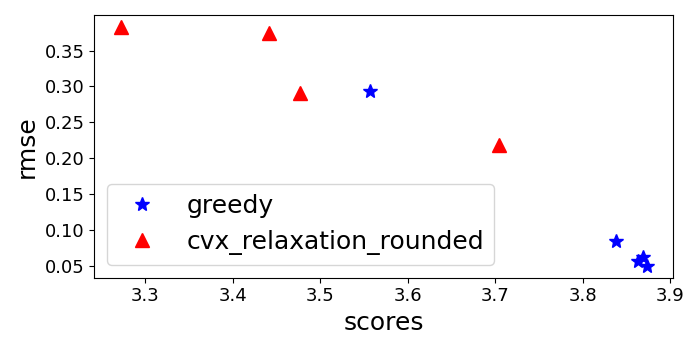

In [18]:
################# RMSE correlation to Score ##################
def zip_and_sort(list1, list2, field=0):
    zipped = list(zip(list1, list2))
    sorted_zipped = sorted(zipped, key=lambda x: x[field])
    sorted_1, sorted_2 = zip(*sorted_zipped)
    return sorted_1, sorted_2

gscores = []
fwscores = []
eqscores = []
stdscores = []
rndscores = []

grmse = []
grmse_loc = []
fwrmse = []
fwrmse_loc = []
eqrmse = []
eqrmse_loc = []
stdrmse = []
stdrmse_loc = []
rndrmse = []
rndrmse_loc = []
num_exp= 10
for i in range(2,7):
    gscores = gscores + dfs[i]['greedy_score'][0 : num_exp].tolist()
    fwscores = fwscores + dfs[i]['fw_score'][0 : num_exp].tolist()
    eqscores = eqscores + dfs[i]['eq_score'][0 : num_exp].tolist()
    stdscores = stdscores + dfs[i]['std_score'][0 : num_exp].tolist()
    rndscores = rndscores + dfs[i]['rnd_score'][0 : num_exp].tolist()
    
    grmse = grmse + dfs[i]['rmse_slam_g'][0 : num_exp].tolist()
    grmse_loc = grmse_loc + dfs[i]['rmse_loc_g'][0 : num_exp].tolist()
    fwrmse = fwrmse + dfs[i]['rmse_slam'][0 : num_exp].tolist()
    fwrmse_loc = fwrmse_loc + dfs[i]['rmse_loc'][0 : num_exp].tolist()
    eqrmse = eqrmse + dfs[i]['rmse_slam_eq'][0 : num_exp].tolist()
    eqrmse_loc = eqrmse_loc + dfs[i]['rmse_loc_eq'][0 : num_exp].tolist()
    stdrmse = stdrmse + dfs[i]['rmse_slam_std'][0 : num_exp].tolist()
    stdrmse_loc = stdrmse_loc + dfs[i]['rmse_loc_std'][0 : num_exp].tolist()
    rndrmse = rndrmse + dfs[i]['rmse_slam_rnd'][0 : num_exp].tolist()
    rndrmse_loc = rndrmse_loc + dfs[i]['rmse_loc_rnd'][0 : num_exp].tolist()

    
# sorted_scores_g, sorted_rmse_g = zip_and_sort(gscores, grmse)
# sorted_scores_fw, sorted_rmse_fw = zip_and_sort(fwscores, fwrmse)
# sorted_scores_eq, sorted_rmse_eq = zip_and_sort(eqscores, eqrmse)
# sorted_scores_std, sorted_rmse_std = zip_and_sort(stdscores, stdrmse)
# sorted_scores_rnd, sorted_rmse_rnd = zip_and_sort(rndscores, rndrmse)
    
# sorted_scores_g, sorted_rmse_g = zip_and_sort(gscores, grmse_loc)
# sorted_scores_fw, sorted_rmse_fw = zip_and_sort(fwscores, fwrmse_loc)
# sorted_scores_eq, sorted_rmse_eq = zip_and_sort(eqscores, eqrmse_loc)
# sorted_scores_std, sorted_rmse_std = zip_and_sort(stdscores, stdrmse_loc)
# sorted_scores_rnd, sorted_rmse_rnd = zip_and_sort(rndscores, rndrmse_loc)
    

#Zip and sort all scores from all benchmarks
# sorted_scores_g, sorted_rmse_g = zip_and_sort(score_list_g[0], rmse_slam_list_g[0])
# sorted_scores_fw, sorted_rmse_fw = zip_and_sort(score_list_fw[0], rmse_slam_list_fw[0])
# sorted_scores_eq, sorted_rmse_eq = zip_and_sort(score_list_eq[0], rmse_slam_list_eq[0])
# sorted_scores_std, sorted_rmse_std = zip_and_sort(score_list_std[0], rmse_slam_list_std[0])
# sorted_scores_rnd, sorted_rmse_rnd = zip_and_sort(score_list_rnd[0], rmse_slam_list_rnd[0])

sorted_scores_g, sorted_rmse_g = zip_and_sort(score_list_g[0], rmse_med_slam_list_g[0])
sorted_scores_fw, sorted_rmse_fw = zip_and_sort(score_list_fw[0], rmse_med_slam_list_fw[0])
sorted_scores_eq, sorted_rmse_eq = zip_and_sort(score_list_eq[0], rmse_med_slam_list_eq[0])
sorted_scores_std, sorted_rmse_std = zip_and_sort(score_list_std[0], rmse_med_slam_list_std[0])
sorted_scores_rnd, sorted_rmse_rnd = zip_and_sort(score_list_rnd[0], rmse_med_slam_list_rnd[0])

# sorted_scores_g, sorted_rmse_g = zip_and_sort(score_list_g[0], rmse_loc_list_g[0])
# sorted_scores_fw, sorted_rmse_fw = zip_and_sort(score_list_fw[0], rmse_loc_list_fw[0])
# sorted_scores_eq, sorted_rmse_eq = zip_and_sort(score_list_eq[0], rmse_loc_list_eq[0])
# sorted_scores_std, sorted_rmse_std = zip_and_sort(score_list_std[0], rmse_loc_list_std[0])
# sorted_scores_rnd, sorted_rmse_rnd = zip_and_sort(score_list_rnd[0], rmse_loc_list_rnd[0])


f_size=18
plt.figure(figsize=(7, 3.5))

plt.subplot(1, 1, 1)
print("rmse greedy:")
print(len(sorted_rmse_g))
print("rmse frank-wolfe:")
print(len(sorted_rmse_fw))

r_fw= np.array(sorted_rmse_fw)
s_fw= np.array(sorted_scores_fw)
msk = ~(r_fw>4)
s_fw = s_fw[msk]
r_fw = r_fw[msk]

r_g= np.array(sorted_rmse_g)
s_g= np.array(sorted_scores_g)
s_g = s_g[msk]
r_g = r_g[msk]

sorted_rmse_g = r_g.tolist()
sorted_rmse_fw = r_fw.tolist()
sorted_scores_g = s_g.tolist()
sorted_scores_fw = s_fw.tolist()
print("rmse greedy:")
print(len(sorted_rmse_g))
print("rmse frank-wolfe:")
print(len(sorted_rmse_fw))


plt.plot(sorted_scores_g, sorted_rmse_g,'b*', label="greedy",markersize=10)
plt.plot(sorted_scores_fw[1:], sorted_rmse_fw[1:],'r^', label="cvx_relaxation_rounded",markersize=10)
#plt.plot(sorted_scores_eq[1:], sorted_rmse_eq[1:],'g^', label="even")
#plt.plot(sorted_scores_std, sorted_rmse_std,'m^', label="manual")
#plt.plot(sorted_scores_rnd[1:], sorted_rmse_rnd[1:],'y^', label="random")


plt.legend(fontsize=f_size)
#plt.title("rmse vs score",fontsize=f_size)
plt.xlabel("scores",fontsize=f_size)
plt.ylabel("rmse",fontsize=f_size)
plt.yticks(fontsize=f_size-5)
plt.xticks(fontsize=f_size-5)
plt.tight_layout()
# plt.subplot(2, 1, 2)
# sorted_scores_g, sorted_rmse_loc_g = zip_and_sort(all_traj_mean_scores_g, all_traj_rmse_loc_g)
# sorted_scores_fw, sorted_rmse_loc_fw = zip_and_sort(all_traj_mean_scores_fw, all_traj_rmse_loc_fw)

# plt.plot(sorted_scores_g, sorted_rmse_loc_g, label="greedy")
# plt.plot(sorted_scores_fw, sorted_rmse_loc_fw, label="franke-wolfe")


# plt.legend()
# plt.title("rmse vs score")
# plt.xlabel("scores")
# plt.ylabel("rmse-loc")
                  

1
[2, 3, 4, 5, 6]
[0. 0. 0. 0. 0.]
[25.530046860376995, 39.28355832894642, 56.12080454826355, 72.79967463016509, 91.81265385945638]


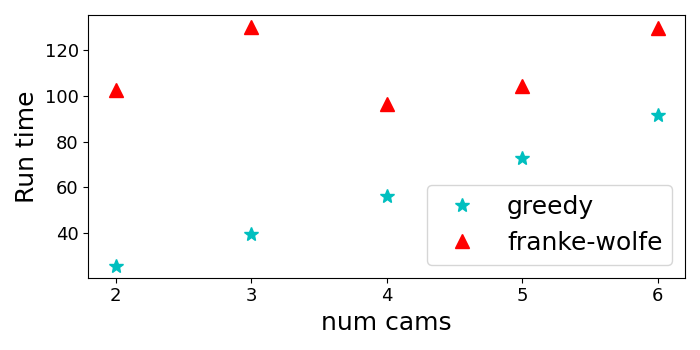

In [9]:
###### Run Time comparison between greedy and Franke-wolfe methods

f_size=18
def plot_times_all(num_cams_list, times_list_g,times_list_fw, num_trajs, traj_names  ):
    plt.figure(figsize=(7, 3.5))
    assert( num_trajs == len(traj_names))
    print(num_cams_list)
    avg_times_g = np.zeros(len(num_cams_list))
    avg_times_fw = np.zeros(len(num_cams_list))
    print(avg_times_g)
    for traj in range(num_trajs):
        avg_times_g = avg_times_g + np.array(times_list_g[traj])
        avg_times_fw = avg_times_fw + np.array(times_list_fw[traj])
    avg_times_g= avg_times_g /6
    avg_times_fw= avg_times_fw /6
    
    print(avg_times_g.tolist())
    plt.subplot(num_trajs, 1, traj+1)
    plt.plot(num_cams_list,avg_times_g.tolist() , 'c*', label="greedy", markersize=10)
    plt.plot(num_cams_list, avg_times_fw.tolist(), 'r^',label="franke-wolfe", markersize=10)
        

    plt.legend(fontsize=f_size)
    #plt.title(traj_names[traj])
    plt.ylabel("Run time",fontsize=f_size)
    plt.xlabel("num cams",fontsize=f_size)
    
    xint = []
    for each in num_cams_list:
        xint.append(int(each))
    plt.xticks(xint,fontsize=f_size-5)
    plt.yticks(fontsize=f_size-5)
    plt.tight_layout()
print(num_trajs)
plot_times_all(num_cams_list, times_list_g,times_list_fw, num_trajs, ['circle']  )
plt.show()

[0.9792505708003392, 0.9798470388809277, 0.9801460431929947, 0.9803251519018455, 0.9804438005042925]
[0.9587286947197552, 0.9762649248812526, 0.9783616226879248, 0.979836749026716, 0.9802031160784984]
[0.0214053  0.0036692  0.00182389 0.00049845 0.00024555]


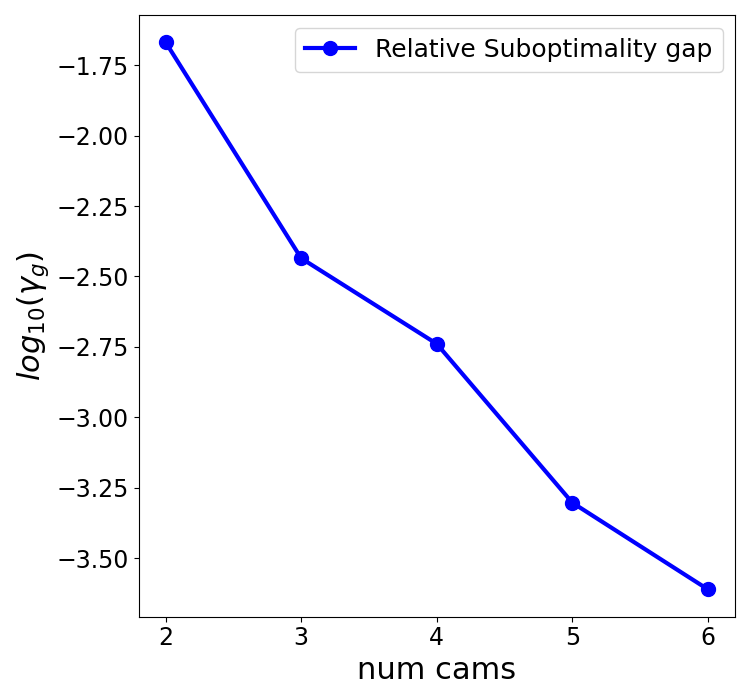

In [10]:
#plot the suboptimality gap between greedy and cvx relxation
# (unr_score - greedy_score)/greedyscore
f_size=22
t_name="Lateral"
def plot_suboptim_gap_all( num_cams_list,score_list_g, score_list_unr_fw, num_trajs, traj_names   ):
    plt.figure(figsize=(7.5, 7*num_trajs))
    linewid= 3.0
    assert( num_trajs == len(traj_names))
    for traj in range(num_trajs):
        plt.subplot(num_trajs, 1, traj+1)
        
        sub_optim_gap = (np.array(score_med_list_unr_fw[traj]) - np.array(score_med_list_g[traj]) )/np.array(score_med_list_g[traj])
        print(score_med_list_unr_fw[traj])
        print(score_med_list_g[traj])
        print(sub_optim_gap)
        plt.plot(num_cams_list, np.log10(sub_optim_gap.tolist()), 'bo-', label="Relative Suboptimality gap",linewidth =linewid,markersize=10)


        plt.legend(fontsize=f_size-4, loc='upper right')
        #plt.title(t_name,fontsize=f_size)
        plt.xlabel("num cams", fontsize=f_size)
        plt.ylabel("$log_{10}(\gamma_g$)", fontsize=f_size)
        plt.yticks(fontsize = f_size-5)
        xint = []
        for each in num_cams_list:
            xint.append(int(each))
        plt.xticks(xint,fontsize=f_size-5)
plot_suboptim_gap_all( num_cams_list,score_list_g, score_list_unr_fw, num_trajs, ['random']   )
plt.tight_layout() 

In [ ]:
############################################################################################################
######  
############################################################################################################
colors = ['r*', 'b*', 'g*', 'y*', 'c*', 'm*']

# for i in num_cams_list:
#     df_cur = dfs[i][sol_cols_fw]
#     plt.figure(figsize=(6, 6))
#     plt.subplot(1, 1, 1)
#     for row_id in range(len(df_cur)):
#         a1 = df_cur.iloc[row_id].tolist()
#         plt.plot(range(len(a1)), a1,colors[row_id])
#     plt.legend()
    
# plt.show()

for row_id in range(1,2):
    plt.figure(figsize=(6, 6))
    plt.subplot(1, 1, 1)
    print("Exp: "+str(row_id))
    for i in range(2,7):
        df_cur = dfs[i][sol_cols_fw]
        a1 = df_cur.iloc[row_id].tolist()
        plt.plot(range(len(a1)), a1,colors[i-2])
        print("numcams: "+str(i))
        print([j for j in range(56) if a1[j] > 0.1])
    plt.legend()
    plt.title("Exp: "+str(row_id))
    
plt.show()


In [ ]:
#figure for optimal camera config
#draw the several cam configs selected
num_cams = 4

#obtain the candidates from greedy selection
cols = ['greedy_selection'+str(i) for i in range(num_cams)]
np_sel_g = dfs[num_cams][cols].to_numpy()
#print(np_sel_g)

for i in range(np_sel_g.shape[0]):
    a = sorted(np_sel_g[i])
    np_sel_g[i] = a

np_sel_g = np_sel_g.astype(int)

#obtain the candidates from greedy selection
cols = ['fw_selection'+str(i) for i in range(num_cams)]
np_sel_fw = dfs[num_cams][cols].to_numpy()
#print(np_sel_fw)

for i in range(np_sel_fw.shape[0]):
    a = sorted(np_sel_fw[i])
    np_sel_fw[i] = a

np_sel_fw = np_sel_fw.astype(int)

###Lets also extract the top weight candidates and only plot them



import matplotlib.pyplot as plt
import numpy as np
%matplotlib widget
import sys
sys.path.append('../helper_functions')
import helper_functions as helper
import utilities
import math


fig = plt.figure()
fig.clf()
ax = fig.add_subplot(111, projection='3d')
#fig.subplots_adjust(0,0,1,1) # Make the plot tight
ax.set_xlim(-7,7)
ax.set_ylim(-7,7)
ax.set_zlim(-7,7)
fig.suptitle("title")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_box_aspect(aspect=(1, 1, 1))



T_array = np.zeros((0, 4,4))
wTa = np.eye(4)

pose_rots, pose_trans = utilities.generate_candidate_poses((0, 330 / 180 * math.pi), 12, (0, math.pi / 2), 1, 3.0)
##### respext physics
for j, trans in enumerate(pose_trans):
    rot_inds = list(range(len(pose_rots)))
    if j ==0: # no right bottom
        del rot_inds[4:6]
    elif j == 1: #no lower half
        del rot_inds[4:9]
    elif j == 2: # no left bottom
        del rot_inds[7:9]
    elif j == 3: # no right half
        del rot_inds[1:6]
    elif j == 4: # no left half
        del rot_inds[7:12]
    elif j == 5: # no upper right
        del rot_inds[1:3]
    elif j == 6 : # no upper half
        del rot_inds[0:3]
        del rot_inds[7:9]
    elif j == 7: # no upper left
        del rot_inds[10:12]
    for k in rot_inds:
        rot = pose_rots[k]
        T_cam = np.eye(4)
        T_cam[0:3, 0:3] = rot
        T_cam[0:3, 3] = trans
        T_array = np.append(T_array,T_cam[None], axis=0)
print(len(T_array))
# for j, trans in enumerate(pose_trans):
#     for k, rot in enumerate(pose_rots):
#         T_cam = np.eye(4)
#         T_cam[0:3, 0:3] = rot
#         T_cam[0:3, 3] = trans
#         T_array = np.append(T_array,T_cam[None], axis=0)

#helper.plot_cam_array(ax, T_array, wTa, color = 'green', alpha=0.2)
colors=["red", 'blue', 'green', 'cyan', 'magenta', 'brown']
helper.plot_cam_array(ax, T_array, wTa, color = 'green', alpha=0.1)
for i, trans in enumerate(pose_trans[0:2]):
    print(trans)
    wtc_next = pose_trans[i+1]
    pts = np.vstack((trans, wtc_next))
    ax.plot(pts[:,0],pts[:,1],pts[:,2], 'r-')
    
for i, trans in enumerate(pose_trans[5:7]):
    print(trans)
    i = i+5
    wtc_next = pose_trans[i+1]
    pts = np.vstack((trans, wtc_next))
    ax.plot(pts[:,0],pts[:,1],pts[:,2], 'r-')
l= [2,4,7]
for i in range(len(l)-1):
    wtc_next = pose_trans[l[i+1]]
    pts = np.vstack((pose_trans[l[i]], wtc_next))
    ax.plot(pts[:,0],pts[:,1],pts[:,2], 'r-')
l= [0,3,5] 

for i in range(len(l)-1):
    wtc_next = pose_trans[l[i+1]]
    pts = np.vstack((pose_trans[l[i]], wtc_next))
    ax.plot(pts[:,0],pts[:,1],pts[:,2], 'r-')
    

for i in range(num_cams):
    #print(T_array[np_sel_g[:,i]])
    helper.plot_cam_array(ax, T_array[np_sel_g[:,i]], wTa, color = 'magenta', alpha=0.03)
    
    helper.plot_cam_array(ax, T_array[np_sel_fw[:,i]], wTa, color = 'blue', alpha=0.03)



In [ ]:
##################################################################################################################
####### old format when each experiment was different
####################################################################################################################

results_path = "/home/auv/software/Koolaid/GeneralizedCameraToolbox/optimal_camera_placement/latest_results"
res_folders = os.listdir(results_path)
res_folders.sort()
num_cams_list = []

dfs ={}

num_cands = 56
num_exp = 10
num_trajs=4

times_list_g= {traj: [] for traj in range(num_trajs)}
times_list_fw = {traj: [] for traj in range(num_trajs)}
score_list_g = {traj: [] for traj in range(num_trajs)}
score_list_fw = {traj: [] for traj in range(num_trajs)}
score_list_unr_fw = {traj: [] for traj in range(num_trajs)} 
rmse_slam_list_g = {traj: [] for traj in range(num_trajs)}
rmse_slam_list_fw = {traj: [] for traj in range(num_trajs)}
rmse_slam_gt_list_g = {traj: [] for traj in range(num_trajs)}
rmse_slam_gt_list_fw = {traj: [] for traj in range(num_trajs)}
rmse_loc_list_g = {traj: [] for traj in range(num_trajs)}
rmse_loc_list_fw = {traj: [] for traj in range(num_trajs)}
rmse_loc_gt_list_g = {traj: [] for traj in range(num_trajs)}
rmse_loc_gt_list_fw = {traj: [] for traj in range(num_trajs)}

for fol in res_folders:
    print("current folder: "+ fol)
    str1, str2 = fol.split("_")
    num_cams_cur = int(str1[:-4][0])
    num_runs = int(str2[:-4][0])
   
    num_cams_list.append(num_cams_cur)
    l = os.listdir(os.path.join(results_path , fol))
    all_errors_log_file = [i for i in l  if "rmse" in i and "random" in i ][0]
    print(all_errors_log_file)
    #read the results into pandas frame
    base_str_g = 'greedy_selection'
    base_str_fw = 'fw_selection'
    base_str_scipy = 'scipy_selection'
    g_selection_cols =[]
    fw_selection_cols=[]
    scipy_selection_cols = []
    for i in range(num_cams_cur):
        g_selection_cols.append(base_str_g+str(i))
        fw_selection_cols.append(base_str_fw+str(i))
        scipy_selection_cols.append(base_str_scipy+str(i))
        
    sol_cols_fw = ["fw_"+str(i) for i in range(num_cands)]
    sol_cols_scipy = ["scipy_"+str(i) for i in range(num_cands)]
        
    cols =  g_selection_cols + ['time_greedy', 'greedy_score', 'rmse_slam_g', 'rmse_loc_g',
            'rmse_slam_gt_g', 'rmse_loc_gt_g'] + fw_selection_cols + sol_cols_fw+ ['time_fw', 'fw_score', 
            'fw_score_unrounded', 'rmse_slam', 'rmse_loc', 'rmse_slam_gt', 'rmse_loc_gt']+\
             scipy_selection_cols + sol_cols_scipy+ ['time_scipy', 'scipy_score', 
            'scipy_score_unrounded', 'rmse_slam_s', 'rmse_loc_s', 'rmse_slam_gt_s', 'rmse_loc_gt_s']
    #print(cols)
    
    all_errors_log = pd.read_csv(os.path.join(results_path , fol, all_errors_log_file),names=cols, sep=" ")
    
    dfs[num_cams_cur] = all_errors_log
    
    for traj in range(num_trajs):
        avg_time_g = all_errors_log['time_greedy'][traj*num_exp : (traj+1)*num_exp].mean()
        avg_score_g = all_errors_log['greedy_score'][traj*num_exp : (traj+1)*num_exp].mean()
        avg_rmse_slam_g = all_errors_log['rmse_slam_g'][traj*num_exp : (traj+1)*num_exp].mean()
        avg_rmse_gt_slam_g = all_errors_log['rmse_slam_gt_g'][traj*num_exp : (traj+1)*num_exp].mean()
        avg_rmse_loc_g = all_errors_log['rmse_loc_g'][traj*num_exp : (traj+1)*num_exp].mean()
        avg_rmse_gt_loc_g = all_errors_log['rmse_loc_gt_g'][traj*num_exp : (traj+1)*num_exp].mean()
        
        avg_time_fw = all_errors_log['time_fw'][traj*num_exp : (traj+1)*num_exp].mean()
        avg_score_fw = all_errors_log['fw_score'][traj*num_exp : (traj+1)*num_exp].mean()
        avg_score_unr_fw = all_errors_log['fw_score_unrounded'][traj*num_exp : (traj+1)*num_exp].mean()
        avg_rmse_slam_fw = all_errors_log['rmse_slam'][traj*num_exp : (traj+1)*num_exp].mean()
        avg_rmse_gt_slam_fw = all_errors_log['rmse_slam_gt'][traj*num_exp : (traj+1)*num_exp].mean()
        avg_rmse_loc_fw = all_errors_log['rmse_loc'][traj*num_exp : (traj+1)*num_exp].mean()
        avg_rmse_gt_loc_fw = all_errors_log['rmse_loc_gt'][traj*num_exp : (traj+1)*num_exp].mean()
        
        times_list_g[traj].append(avg_time_g)
        times_list_fw[traj].append(avg_time_fw)
        score_list_g[traj].append(avg_score_g )
        score_list_fw[traj].append(avg_score_fw )
        score_list_unr_fw[traj].append(avg_score_unr_fw )
        rmse_slam_list_g[traj].append(avg_rmse_slam_g )
        rmse_slam_list_fw[traj].append(avg_rmse_slam_fw )
        rmse_slam_gt_list_g[traj].append(avg_rmse_gt_slam_g )
        rmse_slam_gt_list_fw[traj].append(avg_rmse_gt_slam_fw )
        rmse_loc_list_g[traj].append(avg_rmse_loc_g )
        rmse_loc_list_fw[traj].append(avg_rmse_loc_fw )
        rmse_loc_gt_list_g[traj].append(avg_rmse_gt_loc_g )
        rmse_loc_gt_list_fw[traj].append(avg_rmse_gt_loc_fw )
    
###plot required

##for circle
%matplotlib inline

def plot_results(score_list_g,score_list_fw,score_list_unr_fw,\
                 rmse_slam_list_g,rmse_slam_list_fw,rmse_loc_list_g,rmse_loc_list_fw,num_trajs   ):
    plt.figure(figsize=(6, 6*num_trajs))
    traj_names={0:"circle", 1:"side", 2:"front", 3:"random"}
    for traj in range(num_trajs):
        plt.subplot(2*num_trajs, 1, traj*2+1)
        plt.plot(num_cams_list, score_list_g[traj], label="greedy")
        plt.plot(num_cams_list, score_list_fw[traj], label="franke-wolfe")
        plt.plot(num_cams_list, score_list_unr_fw[traj], label="franke-wolfe_unr")


        plt.legend()
        plt.title(traj_names[traj])
        plt.xlabel("num cams")
        plt.ylabel("score")


        plt.subplot(2*num_trajs,1, traj*2+2)
        plt.plot(num_cams_list, rmse_slam_list_g[traj], label="rmse-greedy")
        plt.plot(num_cams_list, rmse_slam_list_fw[traj], label="rmse-franke-wolfe")
        #plt.plot(num_cams_list, rmse_slam_gt_list_circle_g, label="rmse-gt_greedy")
        #plt.plot(num_cams_list, rmse_slam_gt_list_circle_fw, label="rmse-gt-franke-wolfe")

        plt.plot(num_cams_list, rmse_loc_list_g[traj], label="rmse-loc-greedy")
        plt.plot(num_cams_list, rmse_loc_list_fw[traj], label="rmse-loc-franke-wolfe")
        #plt.plot(num_cams_list, rmse_loc_gt_list_circle_g, label="rmse-loc-gt_greedy")
        #plt.plot(num_cams_list, rmse_loc_gt_list_circle_fw, label="rmse-loc-gt-franke-wolfe")

        plt.legend()
        plt.title(traj_names[traj])
        plt.xlabel("num cams")
        plt.ylabel("rmse")

#plt.tight_layout()
plot_results(score_list_g,score_list_fw,score_list_unr_fw,\
                 rmse_slam_list_g,rmse_slam_list_fw,rmse_loc_list_g,rmse_loc_list_fw,4   )

plt.show()

In [ ]:
results_path = "/home/auv/software/Koolaid/GeneralizedCameraToolbox/optimal_camera_placement/results/array_candidates"
res_folders = os.listdir(results_path)
res_folders.sort()
num_cams_list = []

times_list_circle_g=[]
times_list_side_g=[]
times_list_forward_g=[]
times_list_random_g=[]
times_list_circle_fw=[]
times_list_side_fw=[]
times_list_forward_fw=[]
times_list_random_fw=[]

score_list_circle_g=[]
score_list_side_g=[]
score_list_forward_g=[]
score_list_random_g=[]
score_list_circle_fw=[]
score_list_side_fw=[]
score_list_forward_fw=[]
score_list_random_fw=[]
score_list_unr_circle_fw=[]
score_list_unr_side_fw=[]
score_list_unr_forward_fw=[]
score_list_unr_random_fw=[]
rmse_slam_list_circle_g=[]
rmse_slam_list_side_g=[]
rmse_slam_list_forward_g=[]
rmse_slam_list_random_g=[]
rmse_slam_list_circle_fw=[]
rmse_slam_list_side_fw=[]
rmse_slam_list_forward_fw=[]
rmse_slam_list_random_fw=[]
rmse_slam_gt_list_circle_g=[]
rmse_slam_gt_list_side_g=[]
rmse_slam_gt_list_forward_g=[]
rmse_slam_gt_list_random_g=[]
rmse_slam_gt_list_circle_fw=[]
rmse_slam_gt_list_side_fw=[]
rmse_slam_gt_list_forward_fw=[]
rmse_slam_gt_list_random_fw=[]

rmse_loc_list_circle_g=[]
rmse_loc_list_side_g=[]
rmse_loc_list_forward_g=[]
rmse_loc_list_random_g=[]
rmse_loc_list_circle_fw=[]
rmse_loc_list_side_fw=[]
rmse_loc_list_forward_fw=[]
rmse_loc_list_random_fw=[]
rmse_loc_gt_list_circle_g=[]
rmse_loc_gt_list_side_g=[]
rmse_loc_gt_list_forward_g=[]
rmse_loc_gt_list_random_g=[]
rmse_loc_gt_list_circle_fw=[]
rmse_loc_gt_list_side_fw=[]
rmse_loc_gt_list_forward_fw=[]
rmse_loc_gt_list_random_fw=[]

dfs ={}

num_cands = 35
num_exp = 50


for fol in res_folders:
    print("current folder: "+ fol)
    str1, str2 = fol.split("_")
    num_cams_cur = int(str1[:-4][0])
    num_runs = int(str2[:-4][0])
   
    num_cams_list.append(num_cams_cur)
    l = os.listdir(os.path.join(results_path , fol))
    all_errors_log_file = [i for i in l  if "rmse" in i and "random" in i ][0]
    print(all_errors_log_file)
    #read the results into pandas frame
    base_str_g = 'greedy_selection'
    base_str_fw = 'fw_selection'
    base_str_scipy = 'scipy_selection'
    g_selection_cols =[]
    fw_selection_cols=[]
    scipy_selection_cols = []
    for i in range(num_cams_cur):
        g_selection_cols.append(base_str_g+str(i))
        fw_selection_cols.append(base_str_fw+str(i))
        scipy_selection_cols.append(base_str_scipy+str(i))
        
#     sol_cols_fw = ["fw_"+str(i) for i in range(num_cands)]
#     sol_cols_scipy = ["scipy_"+str(i) for i in range(num_cands)]
           
#     cols =  g_selection_cols + ['time_greedy', 'greedy_score', 'rmse_slam_g', 'rmse_loc_g',
#             'rmse_slam_gt_g', 'rmse_loc_gt_g'] + fw_selection_cols + sol_cols_fw+ ['time_fw', 'fw_score', 
#             'fw_score_unrounded', 'rmse_slam', 'rmse_loc', 'rmse_slam_gt', 'rmse_loc_gt']+\
#              scipy_selection_cols + sol_cols_scipy+ ['time_scipy', 'scipy_score', 
#             'scipy_score_unrounded', 'rmse_slam_s', 'rmse_loc_s', 'rmse_slam_gt_s', 'rmse_loc_gt_s']
    
    cols =  g_selection_cols + ['time_greedy', 'greedy_score', 'rmse_slam_g', 'rmse_loc_g',
            'rmse_slam_gt_g', 'rmse_loc_gt_g'] + fw_selection_cols + ['time_fw', 'fw_score', 
            'fw_score_unrounded', 'rmse_slam', 'rmse_loc', 'rmse_slam_gt', 'rmse_loc_gt']
    
    #print(cols)
    
    all_errors_log = pd.read_csv(os.path.join(results_path , fol, all_errors_log_file),names=cols, sep=" ")
    
    dfs[num_cams_cur] = all_errors_log
              
    
    avg_time_circle_g = all_errors_log['time_greedy'][0:num_exp].mean()
    avg_time_side_g = all_errors_log['time_greedy'][num_exp:2*num_exp].mean()
    avg_time_forward_g = all_errors_log['time_greedy'][2*num_exp:3*num_exp].mean()
    avg_time_random_g = all_errors_log['time_greedy'][3*num_exp:4*num_exp].mean()
    
    avg_time_circle_fw = all_errors_log['time_fw'][0:num_exp].mean()
    avg_time_side_fw = all_errors_log['time_fw'][num_exp:2*num_exp].mean()
    avg_time_forward_fw = all_errors_log['time_fw'][2*num_exp:3*num_exp].mean()
    avg_time_random_fw = all_errors_log['time_fw'][3*num_exp:4*num_exp].mean()
    
    avg_score_circle_g = all_errors_log['greedy_score'][0:num_exp].mean()
    avg_score_side_g = all_errors_log['greedy_score'][num_exp:2*num_exp].mean()
    avg_score_forward_g = all_errors_log['greedy_score'][2*num_exp:3*num_exp].mean()
    avg_score_random_g = all_errors_log['greedy_score'][3*num_exp:4*num_exp].mean()
    
    avg_score_circle_fw = all_errors_log['fw_score'][0:num_exp].mean()
    avg_score_side_fw = all_errors_log['fw_score'][num_exp:2*num_exp].mean()
    avg_score_forward_fw = all_errors_log['fw_score'][2*num_exp:3*num_exp].mean()
    avg_score_random_fw = all_errors_log['fw_score'][3*num_exp:4*num_exp].mean()
    
    avg_score_unr_circle_fw = all_errors_log['fw_score_unrounded'][0:50].mean()
    avg_score_unr_side_fw = all_errors_log['fw_score_unrounded'][50:100].mean()
    avg_score_unr_forward_fw = all_errors_log['fw_score_unrounded'][100:150].mean()
    avg_score_unr_random_fw = all_errors_log['fw_score_unrounded'][150:200].mean()
    
    avg_rmse_slam_circle_g = all_errors_log['rmse_slam_g'][0:50].mean()
    avg_rmse_slam_side_g = all_errors_log['rmse_slam_g'][50:100].mean()
    avg_rmse_slam_forward_g = all_errors_log['rmse_slam_g'][100:150].mean()
    avg_rmse_slam_random_g = all_errors_log['rmse_slam_g'][150:200].mean()
    
    avg_rmse_slam_circle_fw = all_errors_log['rmse_slam'][0:50].mean()
    avg_rmse_slam_side_fw = all_errors_log['rmse_slam'][50:100].mean()
    avg_rmse_slam_forward_fw = all_errors_log['rmse_slam'][100:150].mean()
    avg_rmse_slam_random_fw = all_errors_log['rmse_slam'][150:200].mean()
    
    avg_rmse_gt_slam_circle_g = all_errors_log['rmse_slam_gt_g'][0:50].mean()
    avg_rmse_gt_slam_side_g = all_errors_log['rmse_slam_gt_g'][50:100].mean()
    avg_rmse_gt_slam_forward_g = all_errors_log['rmse_slam_gt_g'][100:150].mean()
    avg_rmse_gt_slam_random_g = all_errors_log['rmse_slam_gt_g'][150:200].mean()
    
    avg_rmse_gt_slam_circle_fw = all_errors_log['rmse_slam_gt'][0:50].mean()
    avg_rmse_gt_slam_side_fw = all_errors_log['rmse_slam_gt'][50:100].mean()
    avg_rmse_gt_slam_forward_fw = all_errors_log['rmse_slam_gt'][100:150].mean()
    avg_rmse_gt_slam_random_fw = all_errors_log['rmse_slam_gt'][150:200].mean()
    
    
    avg_rmse_loc_circle_g = all_errors_log['rmse_loc_g'][0:50].mean()
    avg_rmse_loc_side_g = all_errors_log['rmse_loc_g'][50:100].mean()
    avg_rmse_loc_forward_g = all_errors_log['rmse_loc_g'][100:150].mean()
    avg_rmse_loc_random_g = all_errors_log['rmse_loc_g'][150:200].mean()
    
    avg_rmse_loc_circle_fw = all_errors_log['rmse_loc'][0:50].mean()
    avg_rmse_loc_side_fw = all_errors_log['rmse_loc'][50:100].mean()
    avg_rmse_loc_forward_fw = all_errors_log['rmse_loc'][100:150].mean()
    avg_rmse_loc_random_fw = all_errors_log['rmse_loc'][150:200].mean()
    
    avg_rmse_gt_loc_circle_g = all_errors_log['rmse_loc_gt_g'][0:50].mean()
    avg_rmse_gt_loc_side_g = all_errors_log['rmse_loc_gt_g'][50:100].mean()
    avg_rmse_gt_loc_forward_g = all_errors_log['rmse_loc_gt_g'][100:150].mean()
    avg_rmse_gt_loc_random_g = all_errors_log['rmse_loc_gt_g'][150:200].mean()
    
    avg_rmse_gt_loc_circle_fw = all_errors_log['rmse_loc_gt'][0:50].mean()
    avg_rmse_gt_loc_side_fw = all_errors_log['rmse_loc_gt'][50:100].mean()
    avg_rmse_gt_loc_forward_fw = all_errors_log['rmse_loc_gt'][100:150].mean()
    avg_rmse_gt_loc_random_fw = all_errors_log['rmse_loc_gt'][150:200].mean()
    
    times_list_circle_g.append(avg_time_circle_g) 
    times_list_side_g.append(avg_time_side_g) 
    times_list_forward_g.append(avg_time_forward_g)
    times_list_random_g.append(avg_time_random_g )
    
    times_list_circle_fw.append(avg_time_circle_fw) 
    times_list_side_fw.append(avg_time_side_fw) 
    times_list_forward_fw.append(avg_time_forward_fw)
    times_list_random_fw.append(avg_time_random_fw)


    score_list_circle_g.append(avg_score_circle_g )
    score_list_side_g.append(avg_score_side_g  )
    score_list_forward_g.append(avg_score_forward_g)
    score_list_random_g.append(avg_score_random_g )
    
    score_list_circle_fw.append(avg_score_circle_fw )
    score_list_side_fw.append(avg_score_side_fw )
    score_list_forward_fw.append(avg_score_forward_fw)
    score_list_random_fw.append(avg_score_random_fw )
 
    score_list_unr_circle_fw.append(avg_score_unr_circle_fw )
    score_list_unr_side_fw.append(avg_score_unr_side_fw )
    score_list_unr_forward_fw.append(avg_score_unr_forward_fw)
    score_list_unr_random_fw.append(avg_score_unr_random_fw )
    
    rmse_slam_list_circle_g.append(avg_rmse_slam_circle_g )
    rmse_slam_list_side_g.append(avg_rmse_slam_side_g )
    rmse_slam_list_forward_g.append(avg_rmse_slam_forward_g)
    rmse_slam_list_random_g.append(avg_rmse_slam_random_g )
    
    rmse_slam_list_circle_fw.append(avg_rmse_slam_circle_fw )
    rmse_slam_list_side_fw.append(avg_rmse_slam_side_fw )
    rmse_slam_list_forward_fw.append(avg_rmse_slam_forward_fw)
    rmse_slam_list_random_fw.append(avg_rmse_slam_random_fw )

    
    rmse_slam_gt_list_circle_g.append(avg_rmse_gt_slam_circle_g )
    rmse_slam_gt_list_side_g.append(avg_rmse_gt_slam_side_g )
    rmse_slam_gt_list_forward_g.append(avg_rmse_gt_slam_forward_g)
    rmse_slam_gt_list_random_g.append(avg_rmse_gt_slam_random_g )
    
    rmse_slam_gt_list_circle_fw.append(avg_rmse_gt_slam_circle_fw )
    rmse_slam_gt_list_side_fw.append(avg_rmse_gt_slam_side_fw )
    rmse_slam_gt_list_forward_fw.append(avg_rmse_gt_slam_forward_fw)
    rmse_slam_gt_list_random_fw.append(avg_rmse_gt_slam_random_fw )
    
    rmse_loc_list_circle_g.append(avg_rmse_loc_circle_g )
    rmse_loc_list_side_g.append(avg_rmse_loc_side_g )
    rmse_loc_list_forward_g.append(avg_rmse_loc_forward_g)
    rmse_loc_list_random_g.append(avg_rmse_loc_random_g )
    
    rmse_loc_list_circle_fw.append(avg_rmse_loc_circle_fw )
    rmse_loc_list_side_fw.append(avg_rmse_loc_side_fw )
    rmse_loc_list_forward_fw.append(avg_rmse_loc_forward_fw)
    rmse_loc_list_random_fw.append(avg_rmse_loc_random_fw )

    
    rmse_loc_gt_list_circle_g.append(avg_rmse_gt_loc_circle_g )
    rmse_loc_gt_list_side_g.append(avg_rmse_gt_loc_side_g )
    rmse_loc_gt_list_forward_g.append(avg_rmse_gt_loc_forward_g)
    rmse_loc_gt_list_random_g.append(avg_rmse_gt_loc_random_g )
    
    rmse_loc_gt_list_circle_fw.append(avg_rmse_gt_loc_circle_fw )
    rmse_loc_gt_list_side_fw.append(avg_rmse_gt_loc_side_fw )
    rmse_loc_gt_list_forward_fw.append(avg_rmse_gt_loc_forward_fw)
    rmse_loc_gt_list_random_fw.append(avg_rmse_gt_loc_random_fw )
    
    
    #for row in all_errors_log.iterrows():
    #    print(row[0])

all_traj_mean_scores_g = score_list_circle_g + score_list_side_g + \
                       score_list_forward_g + score_list_random_g 
all_traj_mean_scores_fw = score_list_circle_fw + score_list_side_fw +\
                        score_list_forward_fw + score_list_random_fw
    
all_traj_mean_rmse_g = rmse_slam_list_circle_g + rmse_slam_list_side_g+\
                       rmse_slam_list_forward_g + rmse_slam_list_random_g
    
all_traj_mean_rmse_fw = rmse_slam_list_circle_fw + rmse_slam_list_side_fw +\
                        rmse_slam_list_forward_fw + rmse_slam_list_random_fw

all_traj_rmse_loc_g = rmse_loc_list_circle_g + rmse_loc_list_side_g +\
                      rmse_loc_list_forward_g +rmse_loc_list_random_g
all_traj_rmse_loc_fw = rmse_loc_list_circle_fw + rmse_loc_list_side_fw +\
                       rmse_loc_list_forward_fw + rmse_loc_list_random_fw
    
####plot required

##for circle
%matplotlib inline


plt.figure(figsize=(6, 24))

plt.subplot(8, 1, 1)
plt.plot(num_cams_list, score_list_circle_g, label="greedy")
plt.plot(num_cams_list, score_list_circle_fw, label="franke-wolfe")
plt.plot(num_cams_list, score_list_unr_circle_fw, label="franke-wolfe_unr")


plt.legend()
plt.title("Circle")
plt.xlabel("num cams")
plt.ylabel("score")


plt.subplot(8,1, 2)
plt.plot(num_cams_list, rmse_slam_list_circle_g, label="rmse-greedy")
plt.plot(num_cams_list, rmse_slam_list_circle_fw, label="rmse-franke-wolfe")
#plt.plot(num_cams_list, rmse_slam_gt_list_circle_g, label="rmse-gt_greedy")
#plt.plot(num_cams_list, rmse_slam_gt_list_circle_fw, label="rmse-gt-franke-wolfe")

plt.plot(num_cams_list, rmse_loc_list_circle_g, label="rmse-loc-greedy")
plt.plot(num_cams_list, rmse_loc_list_circle_fw, label="rmse-loc-franke-wolfe")
#plt.plot(num_cams_list, rmse_loc_gt_list_circle_g, label="rmse-loc-gt_greedy")
#plt.plot(num_cams_list, rmse_loc_gt_list_circle_fw, label="rmse-loc-gt-franke-wolfe")

plt.legend()
plt.title("Circle")
plt.xlabel("num cams")
plt.ylabel("rmse")


##for side

plt.subplot(8, 1, 3)
plt.plot(num_cams_list, score_list_side_g, label="greedy")
plt.plot(num_cams_list, score_list_side_fw, label="franke-wolfe")
plt.plot(num_cams_list, score_list_unr_side_fw, label="franke-wolfe_unr")


plt.legend()
plt.title("side")
plt.xlabel("num cams")
plt.ylabel("score")


plt.subplot(8,1, 4)
plt.plot(num_cams_list, rmse_slam_list_side_g, label="rmse-greedy")
plt.plot(num_cams_list, rmse_slam_list_side_fw, label="rmse-franke-wolfe")
#plt.plot(num_cams_list, rmse_slam_gt_list_side_g, label="rmse-gt_greedy")
#plt.plot(num_cams_list, rmse_slam_gt_list_side_fw, label="rmse-gt-franke-wolfe")

plt.plot(num_cams_list, rmse_loc_list_side_g, label="rmse-loc-greedy")
plt.plot(num_cams_list, rmse_loc_list_side_fw, label="rmse-loc-franke-wolfe")
#plt.plot(num_cams_list, rmse_loc_gt_list_side_g, label="rmse-loc-gt_greedy")
#plt.plot(num_cams_list, rmse_loc_gt_list_side_fw, label="rmse-loc-gt-franke-wolfe")

plt.legend()
plt.title("side")
plt.xlabel("num cams")
plt.ylabel("rmse")


##for forward

plt.subplot(8, 1, 5)
plt.plot(num_cams_list, score_list_forward_g, label="greedy")
plt.plot(num_cams_list, score_list_forward_fw, label="franke-wolfe")
plt.plot(num_cams_list, score_list_unr_forward_fw, label="franke-wolfe_unr")


plt.legend()
plt.title("forward")
plt.xlabel("num cams")
plt.ylabel("score")


plt.subplot(8,1, 6)
plt.plot(num_cams_list, rmse_slam_list_forward_g, label="rmse-greedy")
plt.plot(num_cams_list, rmse_slam_list_forward_fw, label="rmse-franke-wolfe")
#plt.plot(num_cams_list, rmse_slam_gt_list_forward_g, label="rmse-gt_greedy")
#plt.plot(num_cams_list, rmse_slam_gt_list_forward_fw, label="rmse-gt-franke-wolfe")

plt.plot(num_cams_list, rmse_loc_list_forward_g, label="rmse-loc-greedy")
plt.plot(num_cams_list, rmse_loc_list_forward_fw, label="rmse-loc-franke-wolfe")
#plt.plot(num_cams_list, rmse_loc_gt_list_forward_g, label="rmse-loc-gt_greedy")
#plt.plot(num_cams_list, rmse_loc_gt_list_forward_fw, label="rmse-loc-gt-franke-wolfe")


plt.legend()
plt.title("forward")
plt.xlabel("num cams")
plt.ylabel("rmse")

##for random

plt.subplot(8, 1, 7)
plt.plot(num_cams_list, score_list_random_g, label="greedy")
plt.plot(num_cams_list, score_list_random_fw, label="franke-wolfe")
plt.plot(num_cams_list, score_list_unr_random_fw, label="franke-wolfe_unr")


plt.legend()
plt.title("random")
plt.xlabel("num cams")
plt.ylabel("score")


plt.subplot(8,1, 8)
plt.plot(num_cams_list, rmse_slam_list_random_g, label="rmse-greedy")
plt.plot(num_cams_list, rmse_slam_list_random_fw, label="rmse-franke-wolfe")
#plt.plot(num_cams_list, rmse_slam_gt_list_random_g, label="rmse-gt_greedy")
#plt.plot(num_cams_list, rmse_slam_gt_list_random_fw, label="rmse-gt-franke-wolfe")

plt.plot(num_cams_list, rmse_loc_list_random_g, label="rmse-loc-greedy")
plt.plot(num_cams_list, rmse_loc_list_random_fw, label="rmse-loc-franke-wolfe")
#plt.plot(num_cams_list, rmse_loc_gt_list_random_g, label="rmse-loc-gt_greedy")
#plt.plot(num_cams_list, rmse_loc_gt_list_random_fw, label="rmse-loc-gt-franke-wolfe")

plt.legend()
plt.title("random")
plt.xlabel("num cams")
plt.ylabel("rmse")

#plt.tight_layout()

plt.show()

In [ ]:
#figure for optimal camera config
#draw the several cam configs selected

num_cams = 5

cols = ['greedy_selection'+str(i) for i in range(num_cams)]
np_sel = dfs[num_cams][cols][0:15].to_numpy()
#print(np_sel)
for i in range(np_sel.shape[0]):
    a = sorted(np_sel[i])
    np_sel[i] = a

np_sel = np_sel.astype(int)

import matplotlib.pyplot as plt
import numpy as np
%matplotlib widget
import sys
sys.path.append('../helper_functions')
import helper_functions as helper
import utilities
import math

# fig, ax = helper.initialize_3d_plot()

fig = plt.figure()
fig.clf()
ax = fig.add_subplot(111, projection='3d')
#fig.subplots_adjust(0,0,1,1) # Make the plot tight
ax.set_xlim(-7,7)
ax.set_ylim(-7,7)
ax.set_zlim(-7,7)
fig.suptitle("title")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_box_aspect(aspect=(1, 1, 1))


T_array = np.zeros((0, 4,4))
wTa = np.eye(4)


pose_rots, pose_trans = utilities.generate_candidate_poses((0, 330 / 180 * math.pi), 12, (0, math.pi / 2), 1, 3.0)
##### respext physics
for j, trans in enumerate(pose_trans):
    rot_inds = list(range(len(pose_rots)))
    if j ==0: # no right bottom
        del rot_inds[4:6]
    elif j == 1: #no lower half
        del rot_inds[4:9]
    elif j == 2: # no left bottom
        del rot_inds[7:9]
    elif j == 3: # no right half
        del rot_inds[1:6]
    elif j == 4: # no left half
        del rot_inds[7:12]
    elif j == 5: # no upper right
        del rot_inds[1:3]
    elif j == 6 : # no upper half
        del rot_inds[0:3]
        del rot_inds[7:9]
    elif j == 7: # no upper left
        del rot_inds[10:12]
    for k in rot_inds:
        rot = pose_rots[k]
        T_cam = np.eye(4)
        T_cam[0:3, 0:3] = rot
        T_cam[0:3, 3] = trans
        T_array = np.append(T_array,T_cam[None], axis=0)
print(len(T_array))
# for j, trans in enumerate(pose_trans):
#     for k, rot in enumerate(pose_rots):
#         T_cam = np.eye(4)
#         T_cam[0:3, 0:3] = rot
#         T_cam[0:3, 3] = trans
#         T_array = np.append(T_array,T_cam[None], axis=0)

helper.plot_cam_array(ax, T_array, wTa, color = 'green', alpha=0.05)
colors=["red", 'blue', 'green', 'cyan', 'magenta', 'brown']
for i in range(num_cams):
    helper.plot_cam_array(ax, T_array[np_sel[:,i]], wTa, color = 'magenta', alpha=0.05)
#helper.plot_cam_array(ax, T_array[np_sel[:,1]], wTa, color = 'red', alpha=0.01)

